## Общий принцип построения модели

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Advertising.csv')

In [ ]:
df.sample()

,TV,radio,newspaper,sales
109,255.4,26.9,5.5,19.8


----
### Универсальная последовательность по работе с данными

### Разбиваем данные на обучающий и тестовый наборы данных - Train | Test Split

0. Очищаем и масштабируем данные X и y (при необходимости)
1. Разбиваем данные на обучающий и тестовый наборы данных - как для X, так и для y
2. Обучаем объект Scaler на обучающих данных X
3. Применяем масштабирование (scale) для тестовых данных X
4. Создаём модель
5. Обучаем модель на обучающих данных X
6. Оцениваем модель на тестовых данных X (создавая предсказания и сравнивая их с Y_test)
7. Уточняем параметры модели, повторяя шаги 5 и 6

### Как это происходило обычно

In [ ]:
X = df.drop('sales', axis=1)

In [ ]:
y = df['sales']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# приведем все признаки к единому масштабу значений
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# Возьмем модель ridge чтобы были гиперпараметры для настройки
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=100) # пока возьмем крупный alpha

In [ ]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=100)

In [ ]:
y_pred = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

7.34177578903413

Специально был выбран метод Ridge без CV и alpha проставлен наобум, чтобы сейчас реализовать cross-validation. Будем разделять тренировочные данные рандомно и на разных выборках тестить разные alpha, сравнивая их через RMSE

Создадим еще модель ridge только с другим alpha уже

In [ ]:
ridge_model_two = Ridge(alpha=1)

In [ ]:
ridge_model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
y_pred_two = ridge_model_two.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_two)

2.319021579428752

Чтобы сделать оценку более объективной отложим данные в самом начале : train | validation | test

70 | 15 | 15 или 70 | 20 | 10 - процентное соотношение разбивки данных

Получается, что на
- train - обучаются данные
- validation - проверяются и настраиваются гиперпараметры
- test - финальная проверка модели - после нет возвращения и настройки гиперпараметра - цель - оценка на абсолютно новых данных

Если ранее тестовые данные использовались для настройки гиперпараметров, то теперь


## Кросс-валидация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Advertising.csv')

In [ ]:
df.sample()

,TV,radio,newspaper,sales
154,187.8,21.1,9.5,15.6


----
## Обучение - валидация - тестирование (Train | Validation | Test Split Procedure)

Этот подход ещё называют методом с задержкой ("hold-out"), потому что здесь мы не настраиваем параметры модели на финальном тестовом наборе данных, а используем тестовые данные *только* для оценки финального результата.

0. Очищаем и масштабируем данные X и y (при необходимости)
1. Разбиваем данные на обучающий, оценочный и тестовый наборы данных - как для X, так и для y
2. Обучаем объект Scaler на обучающих данных X
3. Масштабируем (scale) оценочные данные X
4. Создаём модель
5. Обучаем модель на обучающих данных X
6. Оцениваем модель на оценочных данных X (создавая предсказания и сравнивая их с Y_eval)
7. Уточняем параметры модели, повторяя шаги 5 и 6
8. Вычисляем финальные метрики на тестовом наборе данных (после этого уже нельзя возвращаться и делать уточнения!)

In [ ]:
X = df.drop('sales', axis=1)

In [ ]:
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 # первое разбиение
 X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# разибение X_other и y_other на тестовые и hold out части
X_eval, X_test, y_eval, y_test = train_test_split(X_other,y_other, test_size=0.5, random_state=101)

Проверим что все разделилось как надо

In [ ]:
len(df)

200

In [ ]:
len(X_train)

140

In [ ]:
len(X_eval)

30

In [ ]:
len(X_test)

30

In [ ]:
# масштабирование
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

fit всегда только на тестовых данных

In [ ]:
scaler.fit(X_train)

StandardScaler()

Ну и преобразуем все данные (не помню почему у не меняем)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_eval = scaler.transform(X_eval)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model_one = Ridge(alpha=100)

In [ ]:
model_one.fit(X_train, y_train)

Ridge(alpha=100)

In [ ]:
y_eval_y_pred = model_one.predict(X_eval)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
RMAE = mean_squared_error(y_eval, y_eval_y_pred)
RMAE

7.320101458823871

In [ ]:
model_two = Ridge(alpha=1)

In [ ]:
model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
new_pred_eval = model_two.predict(X_eval)

In [ ]:
mean_squared_error(y_eval, new_pred_eval)

2.383783075056986

Чтобы получить финальную оценку:
- убеждаемся,что завершили настрйоку гипераметров
- применяем модель для x_test завершающе

In [ ]:
y_final_test_prediction = model_two.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_final_test_prediction)

2.2542600838005176

И делаем заключительное обучение моедли на всем наборе данных

## Функция cross_val_score

K (K-Fold Split) - число, определяющее на сколько частей будет разбит тренировочный набор. Leave one out cross-validation - обычно оно равно 5 или 10

В нашем случае возьмем K = 5.

Из них K-1 для обучения, а оставшаяся часть (у нас пятая) - validate для оценки модели

Голубое - это K-1 часть | Зеленое - отложеное, и все это меняется

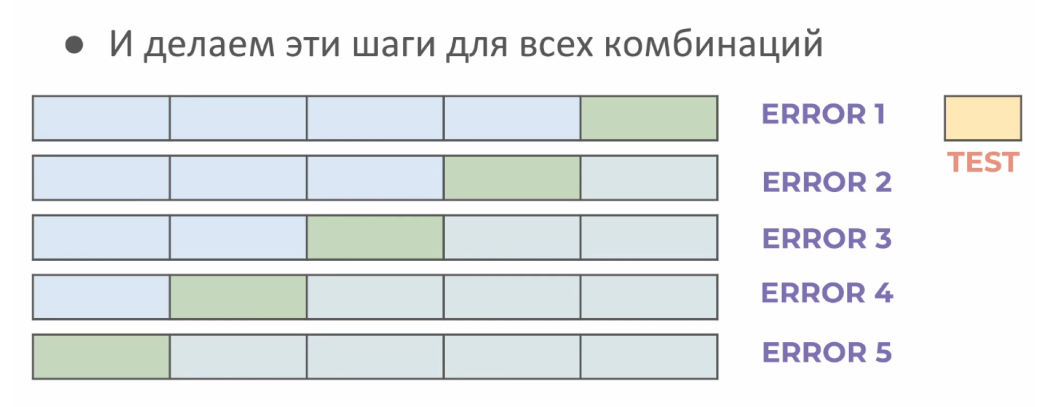

In [68]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/Colab Notebooks/Images/CV1.png')

Сейчас изобразим все на коде

In [88]:
X = df.drop('sales', axis=1)

In [89]:
y = df['sales']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
 # здесь test_size = 30 процентов - это финальный hold out - может быть наример  и 15
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X_train)

StandardScaler()

In [95]:
X_train = scaler.transform(X_train)

In [96]:
X_test = scaler.transform(X_test)

In [97]:
from sklearn.linear_model import Ridge

In [98]:
model = Ridge(alpha=100)

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
# параметры модели
# estimator - модель машинного обучения, ее название (мы ранее создали model = Ridge(alpha=100))
# x_train и y_train - которые разделяются
# cv - количество разбиений
# score - метрика которую получаем
# во всем sklearn - чем больше метрика тем лучше, поэтому rmse (оценка ошибки) здесь будет выводится отрицательной
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [101]:
scores # в результате кросс-валидации получаем следцющие значения (ошибки итоговые)

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [103]:
abs(scores.mean()) # итоговый результат меодели Ridge(alpha=100)

np.float64(8.215396464543607)

Теперь поиск значения гиперпараметров

In [104]:
model = Ridge(alpha=1)

In [105]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [106]:
abs(scores.mean())

np.float64(3.344839296530695)

Результат получился чуть хуже чем ранее без кросс-валидации, но зато более объективные результаты для реальной модели

На деле мы получили просто результаты scoree, но необучили модели.

Задача cross-val-score не обучить модель, а посмотреть как она будет вести себя на разных данные. Посмотрели - оценили - теперь можно обучать.

Поэтому сейчас обучаем

In [107]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [108]:
y_final_test_prediction = model.predict(X_test)

In [109]:
mean_squared_error(y_test, y_final_test_prediction)

2.319021579428752

А вот это уже финальная метрика, которую можно передать начальству

## Cross-validate

In [111]:
## Создаём X и y
X = df.drop('sales',axis=1)
y = df['sales']

# Делаем разбиение на TRAIN и TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Масштабируем данные (SCALE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
from sklearn.model_selection import cross_validate

In [113]:
model = Ridge(alpha=100)

In [114]:
# здесь можно список метрик указать
scores = cross_validate(model, X_train, y_train,
                        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                        cv=10)

In [115]:
scores

{'fit_time': array([0.00477505, 0.002213  , 0.00222468, 0.00183892, 0.00179505,
        0.00173974, 0.00178766, 0.00225353, 0.00189781, 0.00174165]),
 'score_time': array([0.00294495, 0.00183749, 0.00179148, 0.00155401, 0.00159431,
        0.00157666, 0.00159717, 0.00163817, 0.00155544, 0.00152016]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708])}

In [116]:
scores = pd.DataFrame(scores)

In [117]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.004775,0.002945,-6.060671,-1.810212
1,0.002213,0.001837,-10.627031,-2.541958
2,0.002225,0.001791,-3.993426,-1.469594
3,0.001839,0.001554,-5.009494,-1.862769
4,0.001795,0.001594,-9.141800,-2.520697
5,0.001740,0.001577,-13.086256,-2.459995
6,0.001788,0.001597,-3.839405,-1.451971
7,0.002254,0.001638,-9.058786,-2.377395
8,0.001898,0.001555,-9.055457,-2.443344
9,0.001742,0.001520,-5.778882,-1.899797


In [118]:
scores.mean()

,0
fit_time,0.002227
score_time,0.001761
test_neg_mean_squared_error,-7.565121
test_neg_mean_absolute_error,-2.083773


In [122]:
model = Ridge(alpha=1)

In [127]:
scores = cross_validate(model, X_train, y_train,
                        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
                        cv=10)

In [128]:
scores = pd.DataFrame(scores)

In [130]:
scores.mean()

,0
fit_time,0.002154
score_time,0.001641
test_neg_mean_squared_error,-3.323018
test_neg_mean_absolute_error,-1.308467


In [131]:
model.fit(X_train, y_train)

Ridge(alpha=1)

In [132]:
y_final_prediction = model.predict(X_test)

In [133]:
mean_squared_error(y_test, y_final_prediction)

2.319021579428752